# MACHINE LEARNING IN 6 HOURS

#    # LINEAR REGRESSION

Linear regression is a statistical method that helps find the relationsship between an independent and dependent variable, both of which are continuous

In [7]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')


%matplotlib inline

In [3]:
#importing the dataset and extracting the independent and dependent variables
housing  = pd.read_csv("~/Documents/datasets/housing.csv")
cols = list(housing.columns.values)

# we shift what we want to predict to the extreme end of the table 
#be careful when hardcoding numbers fordata that can change
housing = housing[cols[0:7] + [cols[-1]] + cols[7:9]]
housing = housing.drop("total_bedrooms", axis=1)
#X is no longer a dataframe ,but a bunch of arrays
X = housing.iloc[:,:-1].values
y = housing.iloc[:, 8].values
#print to check if y is the median_house value(which we want to predict
print(housing.isnull().sum())
print(y)
housing.head()

longitude             0
latitude              0
housing_median_age    0
total_rooms           0
population            0
households            0
ocean_proximity       0
median_income         0
median_house_value    0
dtype: int64
[452600. 358500. 352100. ...  92300.  84700.  89400.]


,longitude,latitude,housing_median_age,total_rooms,population,households,ocean_proximity,median_income,median_house_value
0,-122.23,37.88,41.0,880.0,322.0,126.0,NEAR BAY,8.3252,452600.0
1,-122.22,37.86,21.0,7099.0,2401.0,1138.0,NEAR BAY,8.3014,358500.0
2,-122.24,37.85,52.0,1467.0,496.0,177.0,NEAR BAY,7.2574,352100.0
3,-122.25,37.85,52.0,1274.0,558.0,219.0,NEAR BAY,5.6431,341300.0
4,-122.25,37.85,52.0,1627.0,565.0,259.0,NEAR BAY,3.8462,342200.0


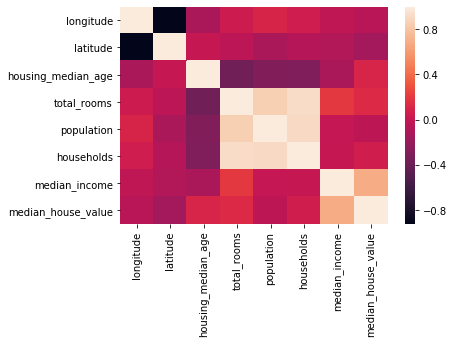

<Figure size 1080x720 with 0 Axes>

In [4]:
# Data visualisation
# Building the Correlation matrix
sns.heatmap(housing.corr())
plt.figure(figsize=(15,10))
plt.show()

In [10]:
# Encoding categorical data
from sklearn.preprocessing import LabelEncoder,OneHotEncoder
labelencoder = LabelEncoder()
X[:, 6] = labelencoder.fit_transform(X[:, 6])

onehotencoder = OneHotEncoder(categorical_features = [6])
X = onehotencoder.fit_transform(X).toarray()


In [9]:
#Remove an extra column brought about by encoding
X = X[:,1:]

In [13]:
#Splitting the dataset into the Training set and Test set
from sklearn.model_selection import train_test_split

X_train,X_test,y_train,y_test = train_test_split(X, y ,test_size = 0.2,random_state = 0)

In [14]:
#Fitting Multiple linear regression into the training set
from sklearn.linear_model import LinearRegression
regressor = LinearRegression()
regressor.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

In [15]:
y_pred = regressor.predict(X_test)
print(y_pred)

[226360.91786771 292299.93978031 181579.0660915  ...  97177.25895442
 256622.57036843 239652.42254986]


In [16]:
# Calculating the coefficients
print(regressor.coef_)

[-3.93710673e+03  3.93710673e+03  2.49245400e+03  7.15830298e+03
 -3.59151964e+03  1.05909804e+04  9.00075815e+03  6.40028165e+03
  2.62864576e+03  1.03244055e+04  1.45535480e+04  7.76908058e+03
  1.44215362e+04  1.55142021e+04  9.12064744e+03  6.65915664e+03
  1.38808457e+04  1.78348864e+04  2.13700000e+04  2.52578574e+04
  1.88328502e+04  2.77890833e+04  2.03633144e+04  2.45514150e+04
  2.97750713e+04  2.06442186e+04  2.31202297e+04  3.08425725e+04
  2.85038114e+04  2.81798751e+04  3.25145840e+04  2.95945148e+04
  2.53822406e+04  2.80446204e+04  2.21323709e+04  2.08433114e+04
  2.60067848e+04  2.83828627e+04  4.07541071e+04  3.99533601e+04
  3.87912926e+04  2.63154473e+04  3.41547271e+04  4.05056639e+04
  3.38654833e+04  3.45273412e+04  2.06278873e+04  4.52443686e+04
  4.14555328e+04  3.92362968e+04  5.56219113e+04  7.69701825e+04
 -4.12363545e+04  1.45688418e+05 -8.94907226e+03  4.78919022e+03
 -2.58840903e+04 -2.50322448e+04 -1.28741330e-01 -4.05156656e+01
  1.31272349e+02  3.73351

In [17]:
#Calculate the intercept
print(regressor.intercept_)

-2157062.307693396


In [18]:
#Calculate r squared score to check validity of model(it better be 0.9 or more)
from sklearn.metrics import r2_score
r2_score(y_test, y_pred)

0.6384060621816523

As you see,.63 is not good enough .Looks like we got a lot of work to do to improve our model

# #LOGISTIC REGRESSION

Here ,we'll train our model to recognize digits

In [19]:
from sklearn.datasets import load_digits
from sklearn.model_selection import train_test_split
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import metrics
%matplotlib inline
digits = load_digits()

In [20]:
print("Image Data Shape", digits.data.shape)
print("Label Data Shape", digits.target.shape)

Image Data Shape (1797, 64)
Label Data Shape (1797,)


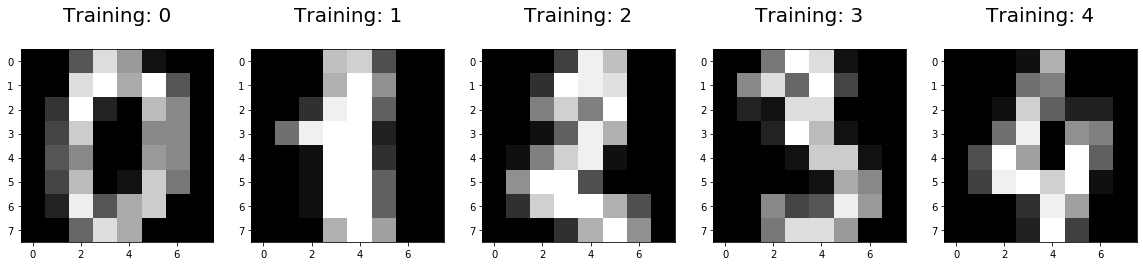

In [23]:
plt.figure(figsize=(20,4))
for index, (image, label) in enumerate(zip(digits.data[0:5],digits.target[0:5])):
    plt.subplot(1, 5,index +1)
    plt.imshow(np.reshape(image, (8,8)), cmap = plt.cm.gray)
    plt.title("Training: %i\n" % label,fontsize = 20)

In [28]:
X_train,X_test, y_train, y_test = train_test_split(digits.data,digits.target,test_size = 0.23, random_state = 2)

In [29]:
print(X_train.shape)

(1383, 64)


In [31]:
print(y_train.shape)

(1383,)


In [32]:
print(X_test.shape)

(414, 64)


In [33]:
print(y_test.shape)

(414,)


In [35]:
from sklearn.linear_model import LogisticRegression

logisticReg = LogisticRegression()
logisticReg.fit(X_train, y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='warn',
          n_jobs=None, penalty='l2', random_state=None, solver='warn',
          tol=0.0001, verbose=0, warm_start=False)

In [42]:
# Returns a NumPy array
# Predict for one Observation(image)

print(logisticReg.predict(X_test[0].reshape(1,-1)))

[4]


In [46]:
predictions = logisticReg.predict(X_test)
score = logisticReg.score(X_test,y_test)
print(score)

0.9420289855072463


In [47]:
#Note the more numbers in the diagonal the more accurate the model
cm = metrics.confusion_matrix(y_test,predictions)
print(cm)

[[38  0  0  0  0  0  0  0  0  0]
 [ 0 44  0  1  0  0  0  0  2  1]
 [ 0  0 43  0  0  0  0  0  0  0]
 [ 0  0  0 37  0  0  0  3  2  0]
 [ 0  2  0  0 34  0  0  0  1  1]
 [ 0  0  0  0  0 46  0  0  0  0]
 [ 0  0  0  0  0  0 40  0  1  0]
 [ 0  0  0  0  0  0  0 45  1  0]
 [ 0  2  0  0  0  0  0  0 35  1]
 [ 0  0  0  1  0  1  0  1  3 28]]


In [48]:
plt.figure(figsize = (9,9))
sns.heatmap(cm, annot=True,fmt = ".3f",linewidths=.5 square= True, cmap = 'Blues_r');
plt.ylabel('Actual Label')
plt.xlabel('Predicted Label')
all_sample_title = 'Accuracy score'.format(score)
plt.title(all_sample_title, size = 15);


SyntaxError: invalid syntax (<ipython-input-48-6b0e03e5d7c4>, line 2)